<a href="https://colab.research.google.com/github/SONNY-SONNIX/sentimental-analysis-with-twitter-roberta-base/blob/main/Fine_tuning_Hugging_face_text_classification_model_with_twitter_roberta_base_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Hugging Face

Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

## Application of Hugging Face Text classification model Fune-tuning

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers


In [ ]:
!pip install accelerate


In [ ]:
!pip install nltk

In [ ]:
!pip install datasets



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.9 MB/s eta 0:00:00


In [ ]:
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=ac9b20e1e4f923c276970147c9edad89f34b33e4748f11f298333d7678684ca9
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [ ]:
!pip install huggingface_hub

Find below a simple example, with just `3 epochs of fine-tuning`.

Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

In [ ]:
import os
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import emoji
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

from matplotlib import axes
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import re,string, unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import string

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

### Data Loading

In [ ]:
# Load the dataset and display some values
#df = pd.read_csv('../data/Train.csv')

#Loading the datasets
%%time
df_train = pd.read_csv('/content/Train.csv')
df_test = pd.read_csv('/content/Test.csv')


# A way to eliminate rows containing NaN values
df_train = df_train[~df_train.isna().any(axis=1)]
df_test = df_test[~df_test.isna().any(axis=1)]


CPU times: user 72.8 ms, sys: 9.48 ms, total: 82.2 ms
Wall time: 100 ms


In [ ]:
#Display the df_train dataset
df_train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
#Display the df_test dataset
df_test.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


#### CRISP-DM Framework

- Data Understanding

- Data Preparation

- Modelling

- Evaluation

- Deployment

#### Renaming of safe_tex column to tweets for df_train & df_test

In [ ]:
df_train.rename(columns={"safe_text":"tweets"},inplace=True)
df_test.rename(columns={"safe_text":"tweets"},inplace=True)
df_train.loc[:5]


,tweet_id,tweets,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667


In [ ]:
df_test.tail()

,tweet_id,tweets
5172,ZXVVNC5O,jenny mccarthy is on new years rockin eve. wha...
5173,ZYIANVI8,Measles reported in Clark Co. for 1st time sin...
5174,ZYITEHAH,<user> issues alert regarding Measles in TX. K...
5175,ZZ3BMBTG,I can't believe people don't vaccinate their k...
5176,ZZIYCVNH,"""<user> Alternatives to #Flu Vaccine <url> #n..."


In [ ]:
# Creating a copy of each DataFrames
train_data = df_train.copy()
test_data= df_train.copy()

In [ ]:
train_data.head()

,tweet_id,tweets,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


## Exploratory Data Analysis


### Checking info

In [ ]:
# creates a list called data containing two variables: train_data and test_data
data = [train_data,test_data]

# creates a list called names containing two variables: train_data and test_data
names = ["train_data","test_data"]

#Create a for loop that iterates over the elements in the data and names lists simultaneously using zip(data, names).
for m, i in zip(data,names):
  print(f'the info' ,i, "dataset are:", "\n\n", m.info(),"\n\n","---"*20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   tweets     9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 648.6+ KB
the info train_data dataset are: 

 None 

 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   tweets     9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 648.6+ KB
the info test_data dataset are: 

 None 

 --------------------------------------------------

In [ ]:

data=[train_data,test_data]
stats=["train_data","test_data"]
for m, i in zip(data,stats):
  print(f'the statistics', i, "of the dataset are", "\n\n", m.describe().transpose(),"\n\n", "---"*20)

the statistics train_data of the dataset are 

             count      mean       std       min       25%  50%  75%  max
label      9999.0  0.301530  0.646740 -1.000000  0.000000  0.0  1.0  1.0
agreement  9999.0  0.854252  0.180707  0.333333  0.666667  1.0  1.0  1.0 

 ------------------------------------------------------------
the statistics test_data of the dataset are 

             count      mean       std       min       25%  50%  75%  max
label      9999.0  0.301530  0.646740 -1.000000  0.000000  0.0  1.0  1.0
agreement  9999.0  0.854252  0.180707  0.333333  0.666667  1.0  1.0  1.0 

 ------------------------------------------------------------


In [ ]:
# creates a list called data containing two variables: train_data and test_data
data = [train_data,test_data]

# creates a list called names containing two variables: train_data and test_data
names = ["train_data","test_data"]

#Create a for loop that iterates over the elements in the data and names lists simultaneously using zip(data, names).
for m, i in zip(data,names):
  print(f'the info' ,i, "dataset are:", "\n\n", m.info(),"\n\n","---"*15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   tweets     9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 648.6+ KB
the info train_data dataset are: 

 None 

 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   tweets     9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 648.6+ KB
the info test_data dataset are: 

 None 

 ---------------------------------------------


### Univariate Analysis

In [ ]:

# creates a list called data containing two variables: train_data and test_data
data = [train_data,test_data]

# creates a list called stats containing two variables: train_data and test_data
stats = ["train_data","test_data"]

#Create a for loop that iterates over the elements in the data and stats lists simultaneously using zip(data, stats).
for m, i in zip(data,stats):
  print(f'The statistical description of the' ,i, "dataset :", "\n\n", m.describe().transpose(),"\n\n","---"*25);

The statistical description of the train_data dataset : 

             count      mean       std       min       25%  50%  75%  max
label      9999.0  0.301530  0.646740 -1.000000  0.000000  0.0  1.0  1.0
agreement  9999.0  0.854252  0.180707  0.333333  0.666667  1.0  1.0  1.0 

 ---------------------------------------------------------------------------
The statistical description of the test_data dataset : 

             count      mean       std       min       25%  50%  75%  max
label      9999.0  0.301530  0.646740 -1.000000  0.000000  0.0  1.0  1.0
agreement  9999.0  0.854252  0.180707  0.333333  0.666667  1.0  1.0  1.0 

 ---------------------------------------------------------------------------


###  Checking for missing values

In [ ]:

# creates a list called data containing two variables: train_data and test_data
data = [train_data,test_data]

# creates a list called missing_value containing two variables: train_data and test_data
missing_value = ["train_data","test_data"]

#Create a for loop that iterates over the elements in the data and stats lists simultaneously using zip(data, stats).
for m, i in zip(data,missing_value):
  print(f'Checking the missing values in ' ,i, "dataset :", "\n\n", m.isna().sum(),"\n\n","---"*25);

Checking the missing values in  train_data dataset : 

 tweet_id     0
tweets       0
label        0
agreement    0
dtype: int64 

 ---------------------------------------------------------------------------
Checking the missing values in  test_data dataset : 

 tweet_id     0
tweets       0
label        0
agreement    0
dtype: int64 

 ---------------------------------------------------------------------------


### Checking Distribution

The distribution of the train_data dataset : 

 [[<Axes: title={'center': 'label'}> <Axes: title={'center': 'agreement'}>]] 

 ---------------------------------------------------------------------------
The distribution of the test_data dataset : 

 [[<Axes: title={'center': 'label'}> <Axes: title={'center': 'agreement'}>]] 

 ---------------------------------------------------------------------------


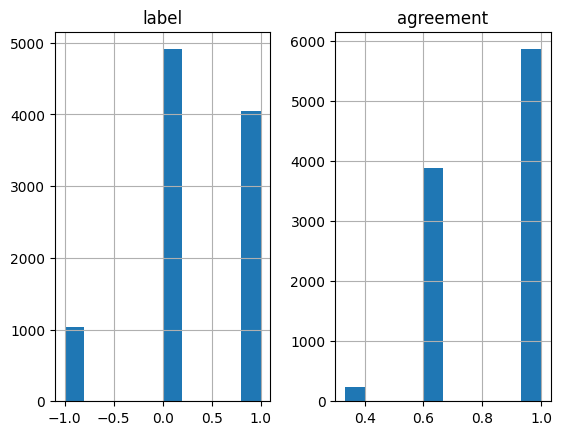

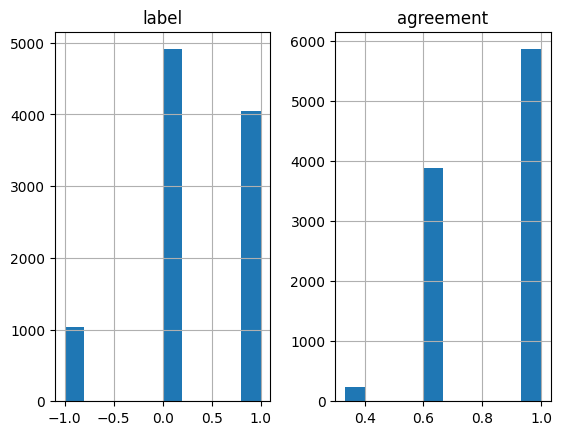

In [ ]:
data = [train_data,test_data]
histogram= ["train_data", "test_data"]
for m, i in zip(data,histogram):
    print(f'The distribution of the' ,i, "dataset :", "\n\n", m.hist(),"\n\n","---"*25)


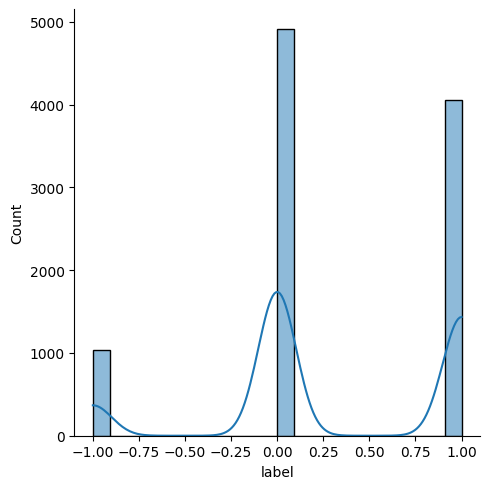

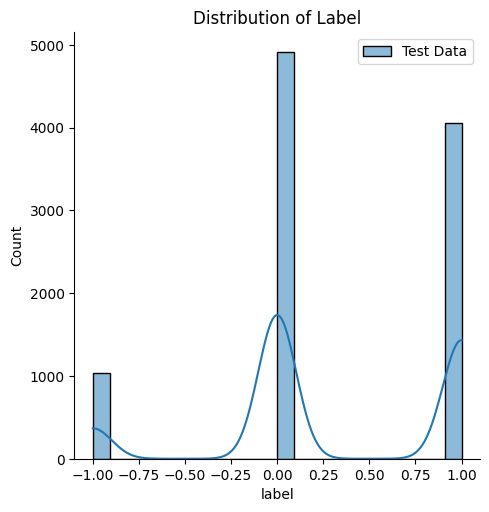

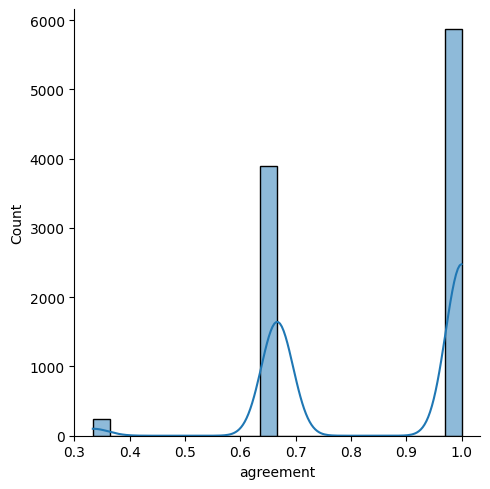

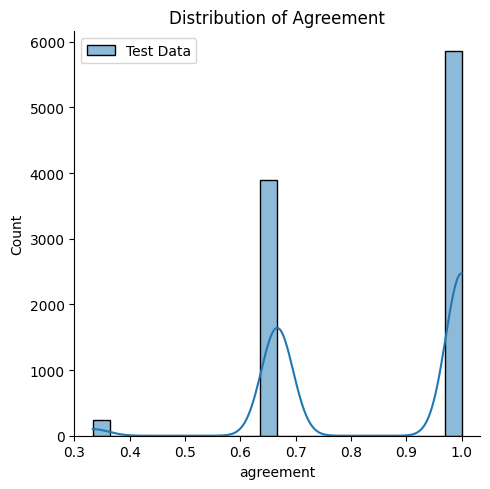

In [ ]:
def plot_displot(train_data, test_data):
    plt.figure(figsize=(10, 5))

# Plotting displot for label column
#plt.subplot(1, 2,1)
sns.displot(train_data['label'], kde=True, label='Train Data')
sns.displot(test_data['label'], kde=True, label='Test Data')
plt.title('Distribution of Label')
plt.legend()

# Plotting displot for agreement column
#plt.subplot( 1,2, 2)
sns.displot(train_data['agreement'], kde=True, label='Train Data')
sns.displot(test_data['agreement'], kde=True, label='Test Data')
plt.title('Distribution of Agreement')
plt.legend()

# Adjusting subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
def find_skewness(train_data,test_data):
  for i in find_skewness:
    print(find_skewness.skew(numeric_only=True))

In [ ]:

# Calculate skewness for train_data
train_data_skew = train_data[['label', 'agreement']].skew()

# Calculate skewness for test_data
test_data_skew = test_data[['label', 'agreement']].skew()

# Display the skewness values
print("Skewness of train_data:")
print(train_data_skew)

print("\nSkewness of test_data:")
print(test_data_skew)


Skewness of train_data:
label       -0.385355
agreement   -0.700600
dtype: float64

Skewness of test_data:
label       -0.385355
agreement   -0.700600
dtype: float64


In [ ]:
print(train_data.columns)

Index(['tweet_id', 'tweets', 'label', 'agreement'], dtype='object')


### Checking for Outliers

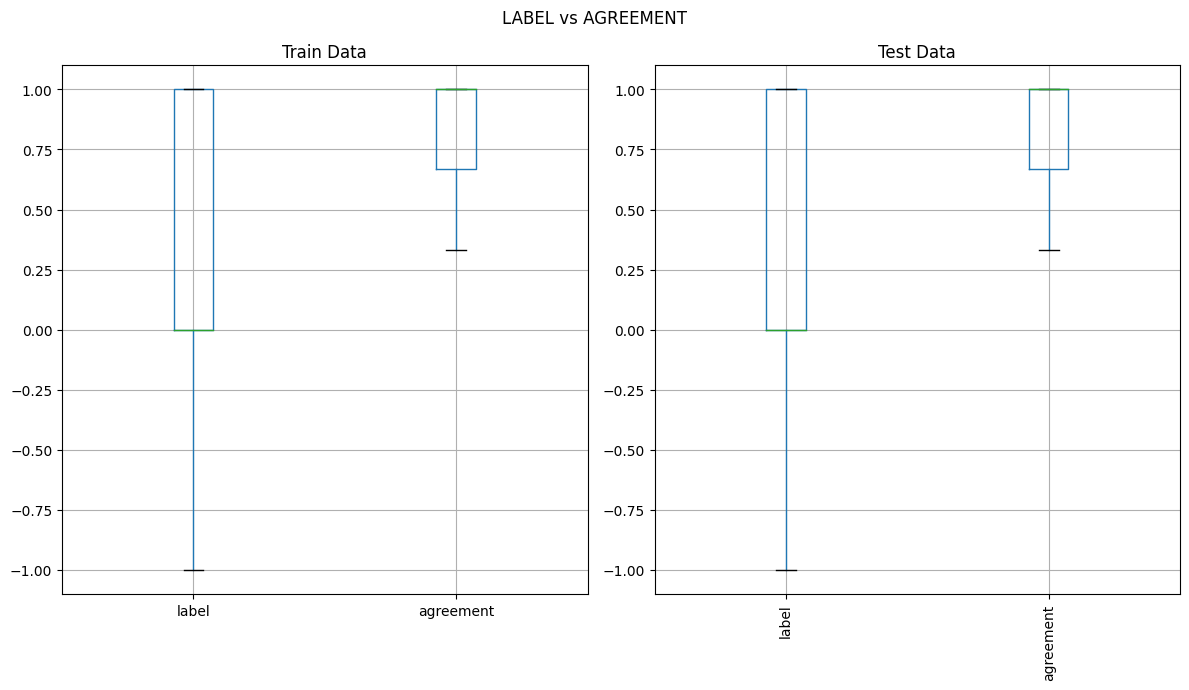

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
train_data.boxplot(column=["label", "agreement"], ax=ax[0])
test_data.boxplot(column=["label", "agreement"], ax=ax[1])
ax[0].set_title("Train Data")
ax[1].set_title("Test Data")
fig.suptitle("LABEL vs AGREEMENT")
plt.ylabel("")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Checking for Duplicates

In [ ]:
def checking_duplicates(train_data,test_data):
    train_duplicates = train_data.duplicated().sum()
    test_duplicates = test_data.duplicated().sum()
    return train_data,test_data
print("Duplicate rows in train_data:", train_data.duplicated().sum())
print("Duplicate rows in test_data:", test_data.duplicated().sum())

Duplicate rows in train_data: 0
Duplicate rows in test_data: 0


### Visualization

In [ ]:
fig_1 = px.histogram(data_frame = train_data,color="label", x="label",template ="plotly_dark",title="Distribution of sentiments ")
fig_1.show()

In [ ]:
# Count of Agreement
fig = px.histogram(train_data,
             x = 'agreement',
             title = 'Histogram of Agreement',
             template = 'plotly_dark',
             color = 'agreement',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

#### Notes:

-Most tweets were neutral

-There were more postive tweets than negative

-There is a random value which doesn't belong
to any of our predefined class

### Dropping the "tweet_id" column

In [ ]:
#def remove_tweet_id_column(train_data,test_data):
   # train_data = train_data.loc[:,train_data.columns!='tweet_id']
    #test_data=test_data.loc[:,test_data.columns!='tweet_id']
train_data=train_data.drop("tweet_id",axis=1)
test_data=test_data.drop("tweet_id",axis=1)
   # return train_data,test_data


In [ ]:
# First 5 rows
train_data[:5]

,tweets,label,agreement
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,I mean if they immunize my kid with something ...,-1.0,1.0
4,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
# Last 5 rows
test_data[-5:]

,tweets,label,agreement
9996,Living in a time where the sperm I used to was...,1.0,1.000000
9997,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000
10000,Pneumonia vaccine: for women w risk of pulmona...,1.0,0.666667


### Converting tweet to Lowercase

In [ ]:

train_data["tweets"]= train_data["tweets"].str.lower()
test_data["tweets"]= test_data["tweets"].str.lower()

In [ ]:
test_data["tweets"].head()

0    me &amp; the big homie meanboy3000 #meanboy #m...
1    i'm 100% thinking of devoting my career to pro...
2    #whatcausesautism vaccines, do not vaccinate y...
3    i mean if they immunize my kid with something ...
4    thanks to <user> catch me performing at la nui...
Name: tweets, dtype: object

### Removing puctuations & Emoji's and replacing them with space

In [ ]:
def punctuation_remover(text):
  #Define the regex pattern to match punctuations
  punctuation_pattern = r"[^\w\s]"

  #Replace punctuation with space
  text_without_punctuation = re.sub(punctuation_pattern,'',text)
  return text_without_punctuation

In [ ]:
train_data["clean_tweet"]=train_data['tweets'].apply(punctuation_remover)
test_data["clean_tweet"]= test_data['tweets'].apply(punctuation_remover)

In [ ]:
train_data[930:950]

,tweets,label,agreement,clean_tweet
930,"“<user> on average, people who complain live l...",0.0,1.000000,user on average people who complain live longe...
931,<user> ncaa tourney edition.hot-faking measles...,0.0,1.000000,user ncaa tourney editionhotfaking measles10mi...
932,immunizations for school 😥👎💉,0.0,0.666667,immunizations for school
933,object lesson re not vaccinating -harrowing s...,1.0,1.000000,object lesson re not vaccinating harrowing st...
934,rt <user> a call about vaccines just came in. ...,1.0,1.000000,rt user a call about vaccines just came in mar...
935,i always make sure i listen to mmr when <user>...,0.0,1.000000,i always make sure i listen to mmr when user i...
936,“<user> original article: intussusception risk...,-1.0,0.666667,user original article intussusception risk aft...
937,<user> <user> <user> 3.) diseases were on the ...,-1.0,1.000000,user user user 3 diseases were on the decline ...
938,<user> #gop stop blaming #immigrants first #eb...,0.0,1.000000,user gop stop blaming immigrants first ebola n...
939,rubella measles officially eliminated from the...,0.0,0.666667,rubella measles officially eliminated from the...


In [ ]:
test_data[-5:]

,tweets,label,agreement,clean_tweet
9996,living in a time where the sperm i used to was...,1.0,1.000000,living in a time where the sperm i used to was...
9997,<user> <user> in spite of all measles outbrea...,1.0,0.666667,user user in spite of all measles outbreaks j...
9998,interesting trends in child immunization in ok...,0.0,1.000000,interesting trends in child immunization in ok...
9999,cdc says measles are at highest levels in deca...,0.0,1.000000,cdc says measles are at highest levels in deca...
10000,pneumonia vaccine: for women w risk of pulmona...,1.0,0.666667,pneumonia vaccine for women w risk of pulmonar...


### Remove common word "user" from "clean_tweet" column

In [ ]:
def word_remover(text):
  return " ".join([word for word in text.split() if word not in ["url","user"]])

In [ ]:
# Apply remove_word using lambda function
train_data["clean_tweet"]=train_data["clean_tweet"].apply(lambda x : word_remover(x))
test_data["clean_tweet"]=test_data["clean_tweet"].apply(lambda x: word_remover(x))

In [ ]:
train_data[930:950]

,tweets,label,agreement,clean_tweet
930,"“<user> on average, people who complain live l...",0.0,1.000000,on average people who complain live longer rel...
931,<user> ncaa tourney edition.hot-faking measles...,0.0,1.000000,ncaa tourney editionhotfaking measles10minsago...
932,immunizations for school 😥👎💉,0.0,0.666667,immunizations for school
933,object lesson re not vaccinating -harrowing s...,1.0,1.000000,object lesson re not vaccinating harrowing sto...
934,rt <user> a call about vaccines just came in. ...,1.0,1.000000,rt a call about vaccines just came in mark rev...
935,i always make sure i listen to mmr when <user>...,0.0,1.000000,i always make sure i listen to mmr when is on ...
936,“<user> original article: intussusception risk...,-1.0,0.666667,original article intussusception risk after ro...
937,<user> <user> <user> 3.) diseases were on the ...,-1.0,1.000000,3 diseases were on the decline before the intr...
938,<user> #gop stop blaming #immigrants first #eb...,0.0,1.000000,gop stop blaming immigrants first ebola now me...
939,rubella measles officially eliminated from the...,0.0,0.666667,rubella measles officially eliminated from the...


In [ ]:
test_data[-5:]

,tweets,label,agreement,clean_tweet
9996,living in a time where the sperm i used to was...,1.0,1.000000,living in a time where the sperm i used to was...
9997,<user> <user> in spite of all measles outbrea...,1.0,0.666667,in spite of all measles outbreaks judge in mi ...
9998,interesting trends in child immunization in ok...,0.0,1.000000,interesting trends in child immunization in ok...
9999,cdc says measles are at highest levels in deca...,0.0,1.000000,cdc says measles are at highest levels in deca...
10000,pneumonia vaccine: for women w risk of pulmona...,1.0,0.666667,pneumonia vaccine for women w risk of pulmonar...


### Removing stopwords from "clean_tweets"

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download stopwords corpus (run once)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of stopwords in English

    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)

    # Remove stopwords from the text
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a single string
    processed_text = ' '.join(filtered_words)

    return processed_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Resolving Resource punkt not found.
#Please use the NLTK Downloader to obtain the resource:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#print(train_data['clean_tweet'].dtype)
#print(test_data['clean_tweet'].dtype)

In [ ]:
#train_data['clean_tweet'] = train_data['clean_tweet'].astype(str)
#test_data['clean_tweet'] = test_data['clean_tweet'].astype(str)


In [ ]:
train_data["clean_tweet"]=train_data['clean_tweet'].apply(remove_stopwords)
test_data["clean_tweet"]= test_data['clean_tweet'].apply(remove_stopwords)

In [ ]:
train_data[930:950]

,tweets,label,agreement,clean_tweet
930,"“<user> on average, people who complain live l...",0.0,1.000000,average people complain live longer releasing ...
931,<user> ncaa tourney edition.hot-faking measles...,0.0,1.000000,ncaa tourney editionhotfaking measles10minsago...
932,immunizations for school 😥👎💉,0.0,0.666667,immunizations school
933,object lesson re not vaccinating -harrowing s...,1.0,1.000000,object lesson vaccinating harrowing story meas...
934,rt <user> a call about vaccines just came in. ...,1.0,1.000000,rt call vaccines came mark revealed son unvacc...
935,i always make sure i listen to mmr when <user>...,0.0,1.000000,always make sure listen mmr guy fckin hysteric...
936,“<user> original article: intussusception risk...,-1.0,0.666667,original article intussusception risk rotaviru...
937,<user> <user> <user> 3.) diseases were on the ...,-1.0,1.000000,3 diseases decline intro vaccines thanks bette...
938,<user> #gop stop blaming #immigrants first #eb...,0.0,1.000000,gop stop blaming immigrants first ebola measle...
939,rubella measles officially eliminated from the...,0.0,0.666667,rubella measles officially eliminated americas...


### Performing Stemming on the "clean_tweet"

In [ ]:
#import nltk
#rom nltk.stem import PorterStemmer

#def perform_stemming(text):
    #stemmer = PorterStemmer()
    #tokens = nltk.word_tokenize(text)
    #stemmed_words = [stemmer.stem(token) for token in tokens]
    #processed_text = ' '.join(stemmed_words)
    #return processed_text


In [ ]:
#train_data["clean_tweet"]=train_data['clean_tweet'].apply(perform_stemming)
#test_data["clean_tweet"]= test_data['clean_tweet'].apply(perform_stemming)

In [ ]:
#train_data[930:993]

### Performing Lemmatization on "clean_tweet" column

In [ ]:
def perform_lemmatization(text):
  lemmatizer = WordNetLemmatizer()
  tokens=nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
  processed_text = ' '.join(lemmatized_words)
  return processed_text

In [ ]:
#Resource wordnet not found.
#Please use the NLTK Downloader to obtain the resource:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
train_data["clean_tweet"]=train_data['clean_tweet'].apply(perform_lemmatization)
test_data["clean_tweet"]= test_data['clean_tweet'].apply(perform_lemmatization)

In [ ]:
train_data[930:950]

,tweets,label,agreement,clean_tweet
930,"“<user> on average, people who complain live l...",0.0,1.000000,average people complain live longer releasing ...
931,<user> ncaa tourney edition.hot-faking measles...,0.0,1.000000,ncaa tourney editionhotfaking measles10minsago...
932,immunizations for school 😥👎💉,0.0,0.666667,immunization school
933,object lesson re not vaccinating -harrowing s...,1.0,1.000000,object lesson vaccinating harrowing story meas...
934,rt <user> a call about vaccines just came in. ...,1.0,1.000000,rt call vaccine came mark revealed son unvacci...
935,i always make sure i listen to mmr when <user>...,0.0,1.000000,always make sure listen mmr guy fckin hysteric...
936,“<user> original article: intussusception risk...,-1.0,0.666667,original article intussusception risk rotaviru...
937,<user> <user> <user> 3.) diseases were on the ...,-1.0,1.000000,3 disease decline intro vaccine thanks better ...
938,<user> #gop stop blaming #immigrants first #eb...,0.0,1.000000,gop stop blaming immigrant first ebola measles...
939,rubella measles officially eliminated from the...,0.0,0.666667,rubella measles officially eliminated america ...


### Applying  Part-of-Speech tagging(POS tagging)


In [ ]:
def apply_pos_tagging(text):
  tokens = nltk.word_tokenize(text)
  pos_tags=nltk.pos_tag(tokens)
  return pos_tags

In [ ]:
#Resource averaged_perceptron_tagger not found.
#Please use the NLTK Downloader to obtain the resource:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
train_data["clean_tweet"]=train_data['clean_tweet'].apply(apply_pos_tagging)
test_data["clean_tweet"]= test_data['clean_tweet'].apply(apply_pos_tagging)

In [ ]:
train_data[930:950]

,tweets,label,agreement,clean_tweet
930,"“<user> on average, people who complain live l...",0.0,1.000000,"[(average, JJ), (people, NNS), (complain, VBP)..."
931,<user> ncaa tourney edition.hot-faking measles...,0.0,1.000000,"[(ncaa, JJ), (tourney, NN), (editionhotfaking,..."
932,immunizations for school 😥👎💉,0.0,0.666667,"[(immunization, NN), (school, NN)]"
933,object lesson re not vaccinating -harrowing s...,1.0,1.000000,"[(object, JJ), (lesson, NN), (vaccinating, VBG..."
934,rt <user> a call about vaccines just came in. ...,1.0,1.000000,"[(rt, NN), (call, NN), (vaccine, NN), (came, V..."
935,i always make sure i listen to mmr when <user>...,0.0,1.000000,"[(always, RB), (make, VB), (sure, JJ), (listen..."
936,“<user> original article: intussusception risk...,-1.0,0.666667,"[(original, JJ), (article, NN), (intussuscepti..."
937,<user> <user> <user> 3.) diseases were on the ...,-1.0,1.000000,"[(3, CD), (disease, NN), (decline, NN), (intro..."
938,<user> #gop stop blaming #immigrants first #eb...,0.0,1.000000,"[(gop, NN), (stop, VB), (blaming, NN), (immigr..."
939,rubella measles officially eliminated from the...,0.0,0.666667,"[(rubella, NN), (measles, NNS), (officially, R..."


### Drop the "tweet" column of the train_data

In [ ]:
#train_data = train_data.drop(["tweets"],axis=1)
#train_data[-10:5]

train_data=train_data.drop("tweets",axis=1)
test_data=test_data.drop("tweets",axis=1)

### Creating a copy of the train_data & saving the dataset

In [ ]:
df = train_data.copy()
df.to_csv('df.csv', index=False)

 Push_to_HuggingFace

> Indented block



In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
df = pd.read_csv('/content/df.csv')f.tail(10)

NameError: ignored

I manually split the training set to have a training subset ( a dataset the model will learn on), and an evaluation subset ( a dataset the model with use to compute metric scores to help use to avoid some training problems like [the overfitting](https://www.ibm.com/cloud/learn/overfitting) one ).

There are multiple ways to do split the dataset. You'll see two commented line showing you another one.

In [ ]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:
train.head()

,label,agreement,clean_tweet
9303,0.0,1.000000,"[('mickey', 'NN'), ('measles', 'VBZ'), ('gone'..."
3907,0.0,1.000000,"[('s1256', 'JJ'), ('new', 'JJ'), ('extends', '..."
795,1.0,0.666667,"[('ignorance', 'NN'), ('vaccine', 'NN'), ('isn..."
5791,0.0,1.000000,"[('pakistan', 'NN'), ('partly', 'RB'), ('suspe..."
3431,0.0,1.000000,"[('news', 'NN'), ('ive', 'JJ'), ('gone', 'VBN'..."


In [ ]:
eval.head()

,label,agreement,clean_tweet
6569,1.0,1.000000,"[('childrens', 'NNS'), ('museum', 'VBP'), ('ho..."
1754,1.0,1.000000,"[('properly', 'RB'), ('immunized', 'VBN'), ('p..."
3325,1.0,1.000000,"[('thx', 'NN'), ('posting', 'VBG'), ('vaccinat..."
1485,1.0,0.666667,"[('baby', 'NN'), ('exactly', 'RB'), ('everyone..."
4175,1.0,1.000000,"[('meeting', 'VBG'), ('tonight', 'VBD'), ('830..."


In [ ]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7999, 3), eval is (2000, 3)


In [ ]:
# Save splitted subsets
train.to_csv("/content/data/train_subset.csv", index=False)
eval.to_csv("/content/data/eval_subset.csv", index=False)


In [ ]:
dataset = load_dataset('csv',
                        data_files={'train': '/content/data/train_subset.csv',
                        'eval': '/content/data/eval_subset.csv'}, encoding = "ISO-8859-1")


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-0477764c4b93e9b9/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

In [ ]:
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['clean_tweet'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = [ 'label','clean_tweet','agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [ ]:
dataset['train']

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 7999
})

In [ ]:
from transformers import TrainingArguments

# Configure the trianing parameters like `num_train_epochs`:
# the number of time the model will repeat the training loop over the dataset
#training_args = TrainingArguments("test_trainer", num_train_epochs=3000, load_best_model_at_end=True,)
training_args = TrainingArguments("test_trainer", num_train_epochs=3, load_best_model_at_end=True,evaluation_strategy="steps",save_strategy="steps",push_to_hub=True,)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import AutoModelForSequenceClassification

# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", num_labels=3)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

In [ ]:
train_dataset = dataset['train'].shuffle(seed=10) #.select(range(40000)) # to select a part
eval_dataset = dataset['eval'].shuffle(seed=10)

## other way to split the train set ... in the range you must use:
# # int(num_rows*.8 ) for [0 - 80%] and  int(num_rows*.8 ),num_rows for the 20% ([80 - 100%])
# train_dataset = dataset['train'].shuffle(seed=10).select(range(40000))
# eval_dataset = dataset['train'].shuffle(seed=10).select(range(40000, 41000))

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset,
)

In [ ]:
trainer.push_to_hub()

In [ ]:
# Launch the learning process: training
trainer.train()

Step,Training Loss,Validation Loss
500,0.847700,0.729838
1000,0.738300,0.733020
1500,0.754400,0.740057
2000,0.750600,0.724366
2500,0.759400,0.721590
3000,0.730100,0.722932


TrainOutput(global_step=3000, training_loss=0.7634131673177084, metrics={'train_runtime': 2482.072, 'train_samples_per_second': 9.668, 'train_steps_per_second': 1.209, 'total_flos': 6313932685218816.0, 'train_loss': 0.7634131673177084, 'epoch': 3.0})

*Don*'t worry the above issue, it is a `KeyboardInterrupt` that means I stopped the training to avoid taking a long time to finish.

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#      eval_dataset=eval_dataset,
#     compute_metrics=compute_metrics,
# )

In [ ]:
# Launch the final evaluation
trainer.evaluate()

{'eval_loss': 0.7215896844863892,
 'eval_accuracy': 0.7155,
 'eval_runtime': 60.604,
 'eval_samples_per_second': 33.001,
 'eval_steps_per_second': 4.125}

Some checkpoints of the model are automatically saved locally in `test_trainer/` during the training.

You may also upload the model on the Hugging Face Platform... [Read more](https://huggingface.co/docs/hub/models-uploading)

This notebook is inspired by an article: [Fine-Tuning Bert for Tweets Classification ft. Hugging Face](https://medium.com/mlearning-ai/fine-tuning-bert-for-tweets-classification-ft-hugging-face-8afebadd5dbf)

Do not hesitaite to read more and to ask questions, the Learning is a lifelong activity.